In [1]:
from functions import *
from embed_functions import *

# print full arrays/dataframes for debugging
# np.set_printoptions(threshold=sys.maxsize)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Import filepaths
datacode, filepaths_raw = import_ima()
print("Number of filepaths before filtering:{}".format(len(filepaths_raw)))

# Remove all filepaths involved in TP quotes
filepaths = process_filepaths(filepaths_raw)
print("Number of filepaths after filtering:{}".format(len(filepaths)))

df = pd.DataFrame()
df["filepaths"] = filepaths

Using TensorFlow backend.


./ima/20200115.dat


C:\Users\root01\PycharmProjects\4yp\functions.py:124: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  usecols=(4))


importing next...
./ima/20200116.dat
importing next...
All IMA measurements in ./ima/ imported successfully.
Number of filepaths before filtering:27950
Number of filepaths after filtering:16903


C:\Users\root01\PycharmProjects\4yp\functions.py:133: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  usecols=(4))


In [2]:
model, encoded_fps = do_doc2vec(filepaths, epochs=150)


Explained variation per principal component:[0.14952007 0.11948302 0.10393511]
showing plot...


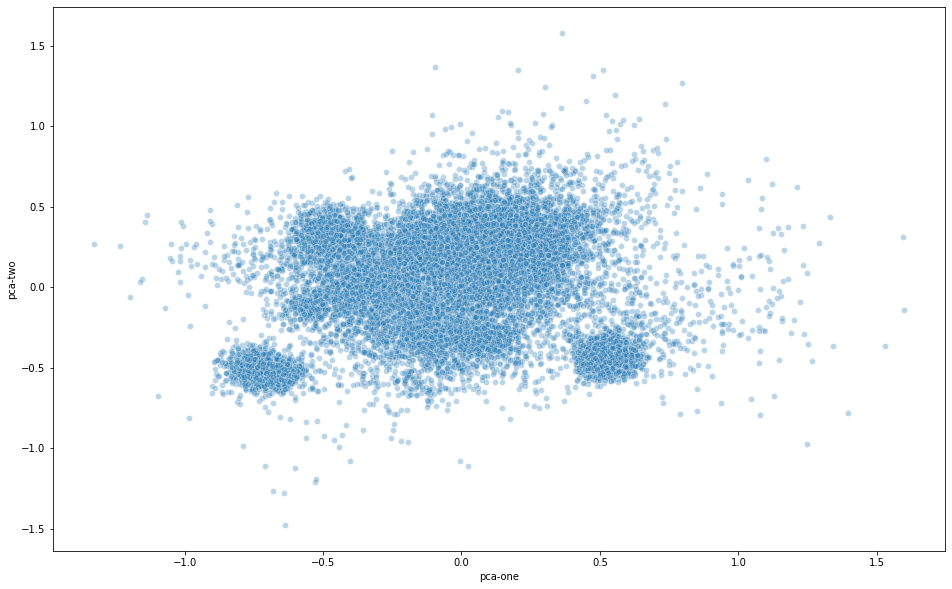

array([[ 0.07931518, -0.27961567, -0.04935791, ..., -0.3265796 ,
         0.07959063, -0.47169283],
       [ 0.24292128, -0.36391345, -0.20801693, ..., -0.11769895,
        -0.01042679, -0.11585837],
       [-0.03444387, -0.15357257, -0.5406729 , ...,  0.16407938,
         0.3653131 , -0.204526  ],
       ...,
       [ 0.14669137, -0.28559938, -0.17294689, ...,  0.54852706,
        -0.48902002, -0.17055015],
       [ 0.13995236, -0.32929438, -0.13701019, ...,  0.5557125 ,
        -0.39579934, -0.14375375],
       [ 0.17166221, -0.29516497, -0.19138692, ...,  0.5423231 ,
        -0.47850809, -0.12768021]], dtype=float32)

In [3]:
func_pca(datanp=encoded_fps, feat_cols=range(1,51), drawplot=1, n_components=3)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 16903 samples in 0.157s...
[t-SNE] Computed neighbors for 16903 samples in 16.374s...
[t-SNE] Computed conditional probabilities for sample 1000 / 16903
[t-SNE] Computed conditional probabilities for sample 2000 / 16903
[t-SNE] Computed conditional probabilities for sample 3000 / 16903
[t-SNE] Computed conditional probabilities for sample 4000 / 16903
[t-SNE] Computed conditional probabilities for sample 5000 / 16903
[t-SNE] Computed conditional probabilities for sample 6000 / 16903
[t-SNE] Computed conditional probabilities for sample 7000 / 16903
[t-SNE] Computed conditional probabilities for sample 8000 / 16903
[t-SNE] Computed conditional probabilities for sample 9000 / 16903
[t-SNE] Computed conditional probabilities for sample 10000 / 16903
[t-SNE] Computed conditional probabilities for sample 11000 / 16903
[t-SNE] Computed conditional probabilities for sample 12000 / 16903
[t-SNE] Computed conditional probabilities for s

<Figure size 1152x720 with 0 Axes>

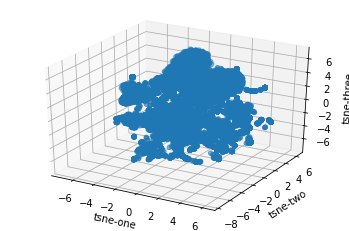

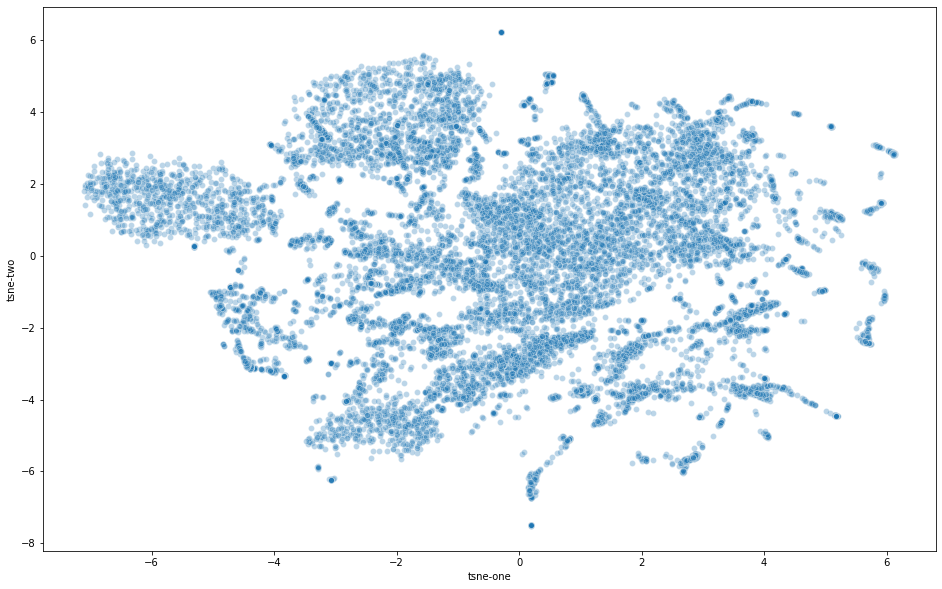

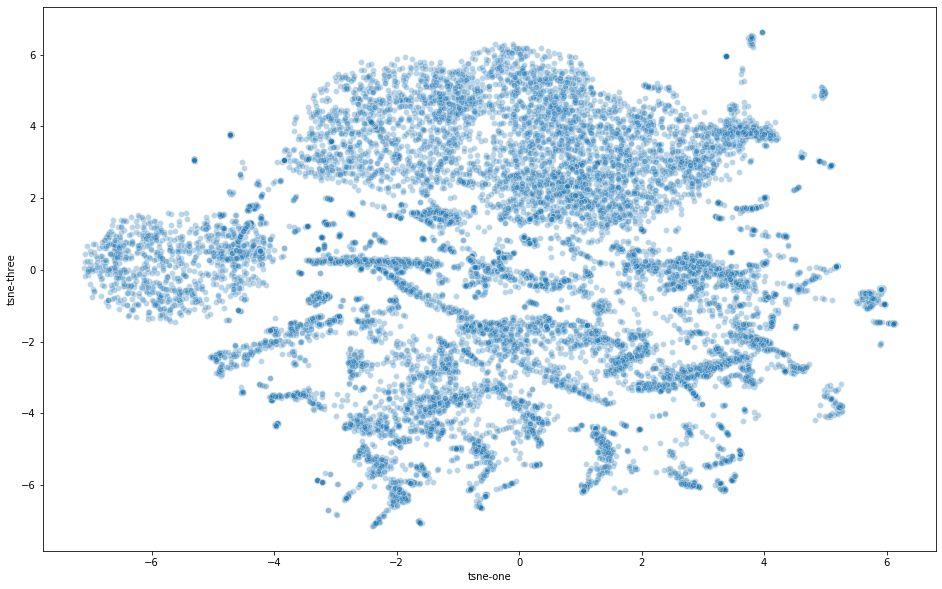

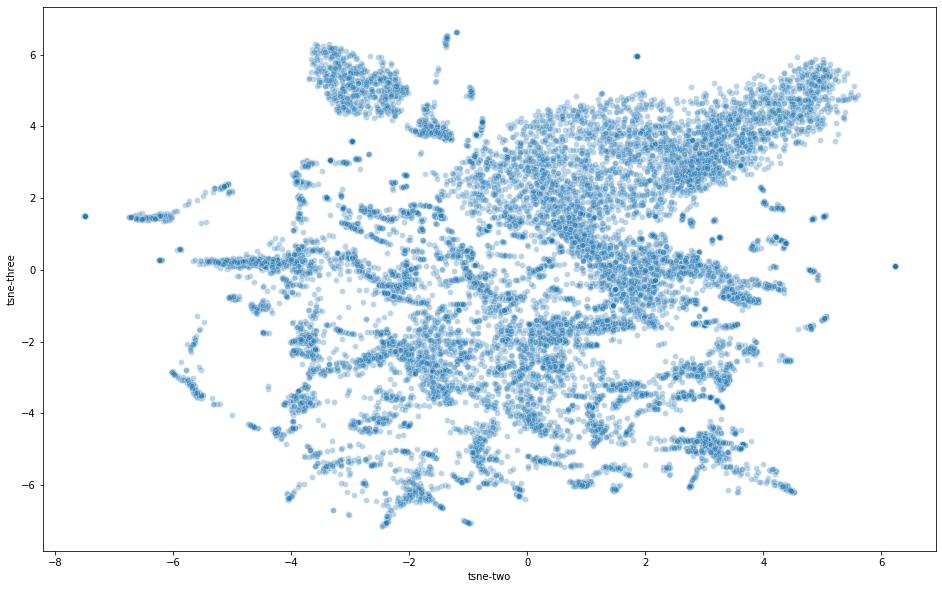

showing  tsne  plot...


array([[ 0.07931518, -0.27961567, -0.04935791, ...,  2.8580766 ,
        -5.549195  , -3.4682195 ],
       [ 0.24292128, -0.36391345, -0.20801693, ..., -2.1019819 ,
         2.7691367 , -0.844046  ],
       [-0.03444387, -0.15357257, -0.5406729 , ..., -1.7473116 ,
         3.3572586 , -0.5767577 ],
       ...,
       [ 0.14669137, -0.28559938, -0.17294689, ...,  0.8595072 ,
        -0.6961629 ,  3.0100737 ],
       [ 0.13995236, -0.32929438, -0.13701019, ...,  3.5904465 ,
         2.3805249 ,  3.4847243 ],
       [ 0.17166221, -0.29516497, -0.19138692, ..., -0.30598128,
         0.9223586 ,  2.4799364 ]], dtype=float32)

In [4]:
func_tsne(datanp=encoded_fps, feat_cols=range(1,51), drawplot=1, n_components=3)


C:\Users\root01\Anaconda3\envs\fouryp\lib\site-packages\numba\typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\Anaconda3\envs\fouryp\lib\site-packages\umap\rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
C:\Users\root01\Anaconda3\envs\fouryp\lib\site-packages\numba\typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\Anaconda3\envs\fouryp\lib\site-packages\um

UMAP done! Time elapsed: 15.46141505241394 seconds
umap done in 3 dimensions


<Figure size 1152x720 with 0 Axes>

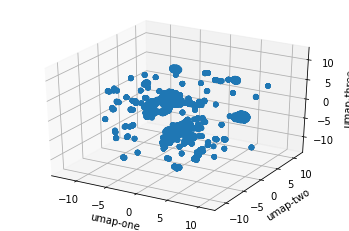

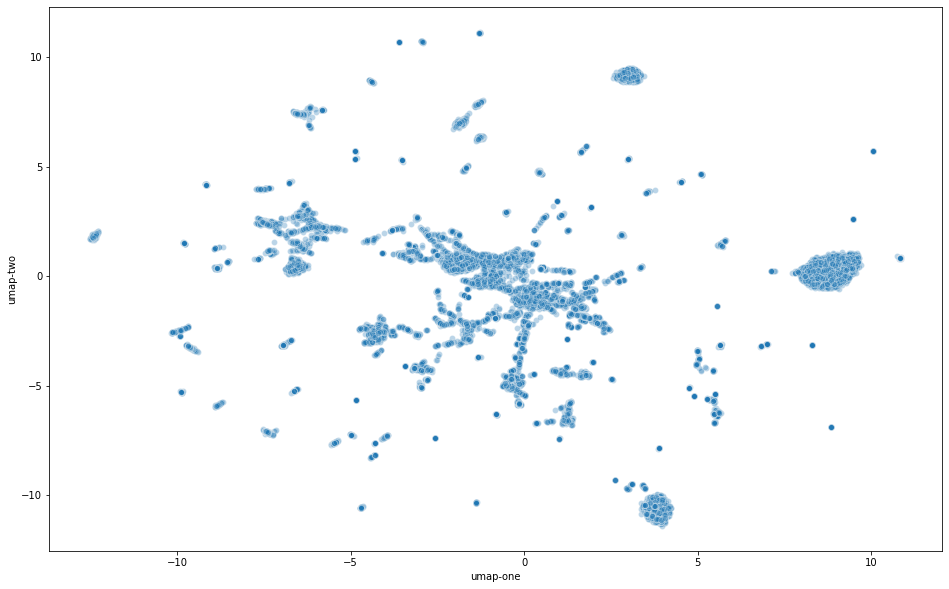

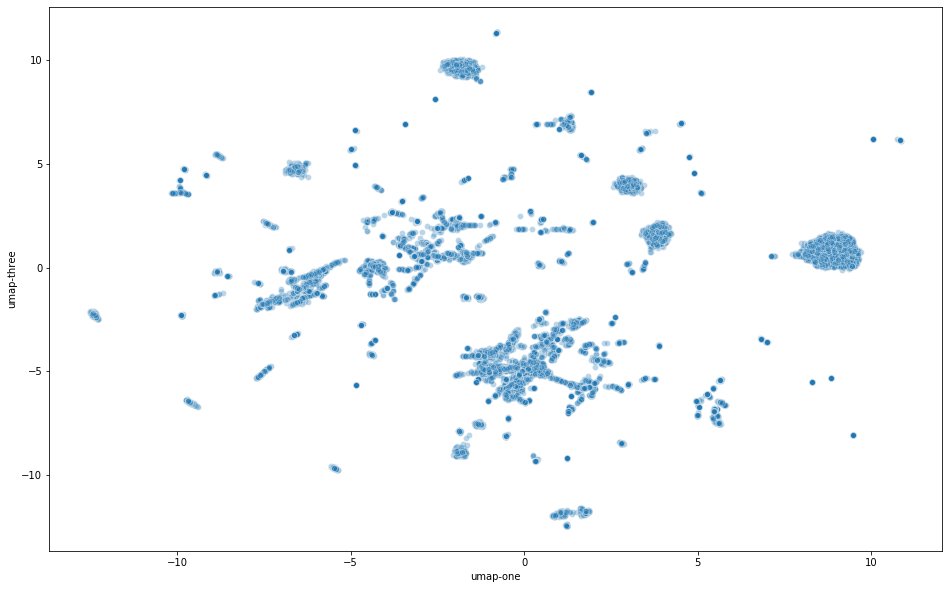

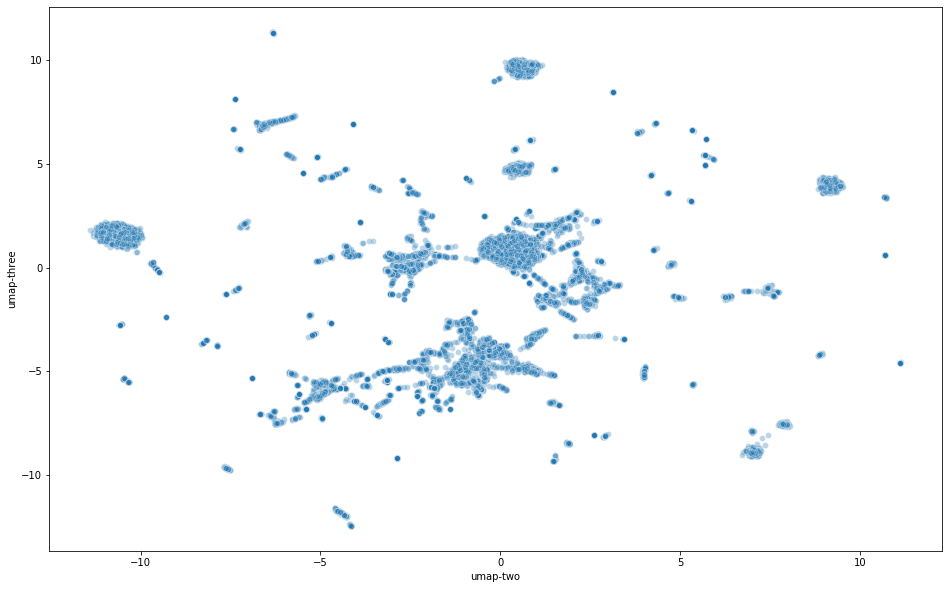

showing  umap  plot...


In [5]:
dataumap = func_umap(datanp=encoded_fps, feat_cols=range(1,51), drawplot=1, n_components=3)

In [6]:
print(dataumap.shape)



(16903, 53)


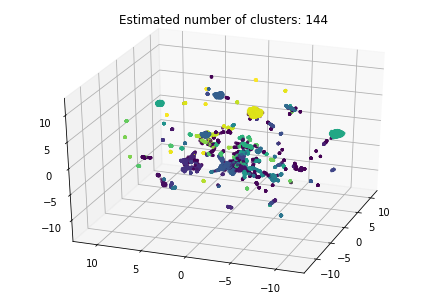

number of cluster found: 145
cluster for each point:  [  0   1   1 ... 136 136 136]


In [7]:
dataumap_clustered = func_dbscan(data=dataumap[:, [50, 51, 52]],
                        eps=0.2,
                        min_samples=20,
                        drawplot=1)

In [8]:
feat_cols = []
feat_cols.append("filepaths")
explore_cluster(datanp=filepaths, 
                dataclust=dataumap_clustered,
                cols=feat_cols,
                filepaths=filepaths
               )